In [1]:
!pip install czifile

In [2]:
import czifile as cz
from czifile import czi2tif
import czifile as cz
from czifile import czi2tif
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats



In [3]:
czi_files=['galactoseA', 'galactoseB', 'galactoseC', 'glucoseA', 'glucoseB', 'glucoseC'] 
czi_ex='.czi'
tiff_ex='.tiff'
tiff_files =[]
for i in range(len(czi_files)):
    cz.czi2tif(czi_files[i]+czi_ex, czi_files[i]+tiff_ex)
    tiff_files.append(czi_files[i]+tiff_ex)

print(tiff_files) #code ensures that files are properlly named as czi files. czi files are then converted to tiff files


Opening CZI file... 0.006695 s
Image
  axes:  TYX
  shape: (16, 512, 512)
  dtype: uint16
  size:  8.00 MiB
Creating empty TIF file... 0.037266 s
Copying image from CZI to TIF file... 0.131875 s

Opening CZI file... 0.003643 s
Image
  axes:  TYX
  shape: (15, 512, 512)
  dtype: uint16
  size:  7.50 MiB
Creating empty TIF file... 0.023435 s
Copying image from CZI to TIF file... 0.087114 s

Opening CZI file... 0.009424 s
Image
  axes:  TYX
  shape: (15, 512, 512)
  dtype: uint16
  size:  7.50 MiB
Creating empty TIF file... 0.017605 s
Copying image from CZI to TIF file... 0.082184 s

Opening CZI file... 0.008768 s
Image
  axes:  TYX
  shape: (16, 512, 512)
  dtype: uint16
  size:  8.00 MiB
Creating empty TIF file... 0.019739 s
Copying image from CZI to TIF file... 0.077657 s

Opening CZI file... 0.009286 s
Image
  axes:  TYX
  shape: (15, 512, 512)
  dtype: uint16
  size:  7.50 MiB
Creating empty TIF file... 0.019917 s
Copying image from CZI to TIF file... 0.079353 s

Opening CZI file...

In [4]:
galact_tiff= ['galactoseA.tiff', 'galactoseB.tiff', 'galactoseC.tiff']
gluc_tiff=['glucoseA.tiff', 'glucoseB.tiff', 'glucoseC.tiff']
#seperating galactose tiff files from glucose tiff files will make it easier for the code below

In [5]:
def calc_mean(sugarA, sugarB,sugarC):
    mean_int = []
    for i in range(15): #each tiff file has 15 images. galactoseA.tiff and glucoseA.tiff had 16 images as the experiment was not stopped in time. the 16th image in galactoseA.tiff and glucoseA.tiff was ignored
        sugarA_pxl_mn = sugarA[i]
        
        sugarB_pxl_mn = sugarB[i]
        
        sugarC_pxl_mn=sugarC[i]
      
        average_int = (sugarA_pxl_mn+sugarB_pxl_mn+sugarC_pxl_mn)/3 #3 cell lines were grown in each sugar medium.
        mean_int.append(average_int)
    return mean_int 
# the function inputs a list of mean fluoresenct intensities for each cell line at each time point. the average fluoresence intensity for each time point is calculated

In [6]:
def threshold(tiff, threshold, chosen_image_num):
    int_at_time = [] #creates a list of fluoresence intensities for each timestamp
    img = tf.imread(tiff)
    img_ref = img[chosen_image_num] #assigns variable name to the image chosen as a reference 
    img_ref_01=np.where(img_ref<threshold,0,1) #creates a mask, any number below the threshold is converted to 0, and any number above the threshold in the nump to 1
    for i in range(len(img)):
        this_img = img[i]
        pxl_intensities = this_img[img_ref_01==1]#mask is applied to all images in order to exclude background and only include cell bodies
        #print(len(pxl_intensities))
        pxl_mn = np.mean(pxl_intensities)
        int_at_time.append(pxl_mn)
    return  int_at_time

In [7]:
galactA=threshold(galact_tiff[0],355,0)
galactB=threshold(galact_tiff[1],295,0)
galactC=threshold(galact_tiff[2],350,0)

#the list of average fluoresence intensities of each image is saved into the variables above

In [8]:
galact_mean_int=calc_mean(galactA,galactB,galactC)
#Calculates the average fluorescence intensity of cells 

In [9]:
print(galact_mean_int)
print(len(galact_mean_int))
#checks that a list of 15 items is generated, meaning the average fluorescence intensity of all 3 cell samples are calculated at each time point

[695.5293408924375, 731.1606588918645, 741.0715511789746, 744.588271403633, 749.7589501154154, 555.1340245855143, 537.3129985060478, 535.2423324646837, 537.5765324951358, 543.8736980841636, 984.3605546156572, 1056.4399463277475, 1072.8061374629567, 1082.6210006350482, 1109.2007787337723]
15


In [10]:
time_points = []
time=-30
for i in range(15):
    time+=30
    time_points.append(time)
print(time_points)
#this list will be used for the x axis of the fluoresence intensity plot

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]


In [11]:
glucA=threshold(gluc_tiff[0],330,0)
glucB=threshold(gluc_tiff[1],290,0)
glucC=threshold(gluc_tiff[2],300,0)
#the list of average fluoresence intensities of each image is saved into the variables above
gluc_mean_int = calc_mean(glucA,glucB,glucC)
#the mean fluorescence intensity of all 3 cell samples are calculated at each time point
#print(gluc_mean_int)

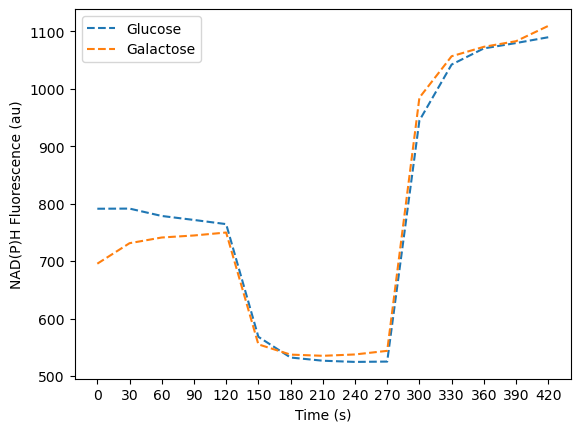

In [12]:
sample_means = [gluc_mean_int,galact_mean_int]
plt.plot(time_points,sample_means[0],linestyle='dashed')
plt.plot(time_points,sample_means[1],linestyle='dashed')
#The mean fluoresence intensity of both cell samples at each time point are plotted on the same graph
plt.xticks(time_points)
plt.xlabel('Time (s)')
plt.ylabel('NAD(P)H Fluorescence (au)')
plt.legend(['Glucose','Galactose'])

In [13]:

sugar_fluorescence_intensity_data={"time":time_points, "Galactose Intensity":galact_mean_int, "Glucose Intensity":gluc_mean_int}
df=pd.DataFrame(data=sugar_fluorescence_intensity_data)
df

,time,Galactose Intensity,Glucose Intensity
0,0,695.529341,791.128153
1,30,731.160659,791.371498
2,60,741.071551,778.541812
3,90,744.588271,771.622074
4,120,749.758950,764.365818
5,150,555.134025,568.275038
6,180,537.312999,532.245137
7,210,535.242332,526.693960
8,240,537.576532,524.595328
9,270,543.873698,525.196565


In [14]:
#calculates the mean fluoresence intensity in galactose cell samples during the addition of FCCP and rotenone respectively
mean_galactose_intensity_FCCP = df['Galactose Intensity'].iloc[5:10].mean()
print(mean_galactose_intensity_FCCP)
mean_galactose_intensity_rotenone = df['Galactose Intensity'].iloc[10:15].mean()
print(mean_galactose_intensity_rotenone)

541.8279172271091
1061.0856835550364


In [15]:
#calculates the mean fluoresence intensity in glucose cell samples during the addition of FCCP and rotenone respectively
mean_glucose_intensity_FCCP = df['Glucose Intensity'].iloc[5:10].mean()
print(mean_glucose_intensity_FCCP)
mean_glucose_intensity_rotenone = df['Glucose Intensity'].iloc[10:15].mean()
print(mean_glucose_intensity_rotenone)

535.4012053616091
1045.0963400241997


In [16]:
NADH_glucose_percentage=[29.60021664,
36.46218777,
38.37085292,
39.04811192,
40.04389462]

NADH_galactose_percentage=[50.17253065,
50.22027389,
47.70314451,
46.34552158,
44.92187527]
#these values were calculated in excel. the formula used to calculate each value is shown in the results section

In [17]:
statistic, p_value = stats.wilcoxon(NADH_glucose_percentage,NADH_galactose_percentage, alternative = 'less')

# Output results
print(f"Wilcoxon statistic: {statistic}")
print(f"P-value: {p_value}")
#A one tailed wilcoxon signed rank test is used to determine whether the decrease in NADH percentage between the 2 cell lines are significant. a p-value lower than 0.05 woold mean the difference is significant

Wilcoxon statistic: 0.0
P-value: 0.03125


In [19]:
galactose_NAD_ratio = [0.420458917,
0.573865963,
0.622608858,
0.640638267,
0.667886854]
glucose_NAD_ratio = [1.006925122,
1.008849944,
0.912160857,
0.86377732,
0.815602846]
#these values are calculated in excel.
statistic, p_value = stats.wilcoxon(galactose_NAD_ratio,glucose_NAD_ratio, alternative = 'less')

# Output results
print(f"Wilcoxon statistic: {statistic}")
print(f"P-value: {p_value}")
#A one tailed wilcoxon signed rank test is used to determine whether the decrease in NADH/NAD+ between the 2 cell lines are significant. a p-value lower than 0.05 woold mean the difference is significant

Wilcoxon statistic: 0.0
P-value: 0.03125
